# Facial Emotion Recognition | VGG19 Model - FER2013 Dataset

![](https://www.researchgate.net/publication/349055345/figure/fig3/AS:987834383085568@1612529478973/FER-2013-sample-images-for-facial-emotion-recognition.jpg)

* Fer2013 dataset is a common dataset used for facial expression recognition. The dataset contains 35,887 grayscale facial images containing 7 different emotions (anger, disgust, fear, happiness, neutral, sad, and surprise).

* VGG19 is a deep learning model known as the Convolutional Neural Network (CNN) architecture. The VGG19 model has 19 layers and consists of 16 layers of convolutional layers and 3 layers of fully connected layers. Convolutional layers extract features from the input image using filters.

* Transfer learning can be performed using the pre-trained weights of the VGG19 model. Transfer learning is the use of the weights of a pre-trained model to help solve a problem in a new dataset.

* For the VGG19 model, pre-trained weights are often used to classify images in the ImageNet dataset. Therefore, the last layer of the VGG19 model is retrained to make it suitable for facial expressions in the fer2013 dataset.

* The last layer of the VGG19 model consists of fully connected layers. These layers are used to classify facial expressions in the dataset. Since there are 7 different emotion classes in the Fer2013 dataset, the last layer of the VGG19 model is retrained to have a 7-output classifier.

* Retraining of the VGG19 model is performed with multiple epochs to achieve higher accuracy rates. An epoch is a complete scan of the training data by the model once.

* During training, performance metrics such as model accuracy and loss are tracked. At the end of the training, the accuracy of the model is evaluated by its performance on the test data.
* The VGG19 model gives very good results for the classification of facial expressions in the Fer2013 dataset. However, there may be imbalance between classes in the dataset. Therefore, taking into account the imbalance of training data between classes can help improve the performance of the model.
 
* To further improve the performance of the model, data preprocessing techniques can be used. For example, the sizes of faces in the dataset can be standardized and filtering techniques can be applied to reduce noise.
 
* The VGG19 model is a widely used model in the field of facial expression recognition in the Fer2013 dataset. However, there are other models that perform better on different datasets. Therefore, different models may be preferred depending on the characteristics of the data set and the problem area.
 
* Finally, different metrics can be used to evaluate the performance of the model. For example, metrics such as accuracy, sensitivity, specificity, F1 score, and ROC curve can help evaluate model performance from different perspectives.

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fer2013/icml_face_data.csv
/kaggle/input/fer2013/example_submission.csv
/kaggle/input/fer2013/train.csv
/kaggle/input/fer2013/test.csv
/kaggle/input/fer2013/fer2013/fer2013/README
/kaggle/input/fer2013/fer2013/fer2013/fer2013.bib
/kaggle/input/fer2013/fer2013/fer2013/fer2013.csv


## Library

In [2]:
import math
import numpy as np
import pandas as pd

import cv2
import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
df = pd.read_csv('/kaggle/input/fer2013/fer2013/fer2013/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [5]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [6]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [7]:
math.sqrt(len(df.pixels[0].split(' ')))

48.0

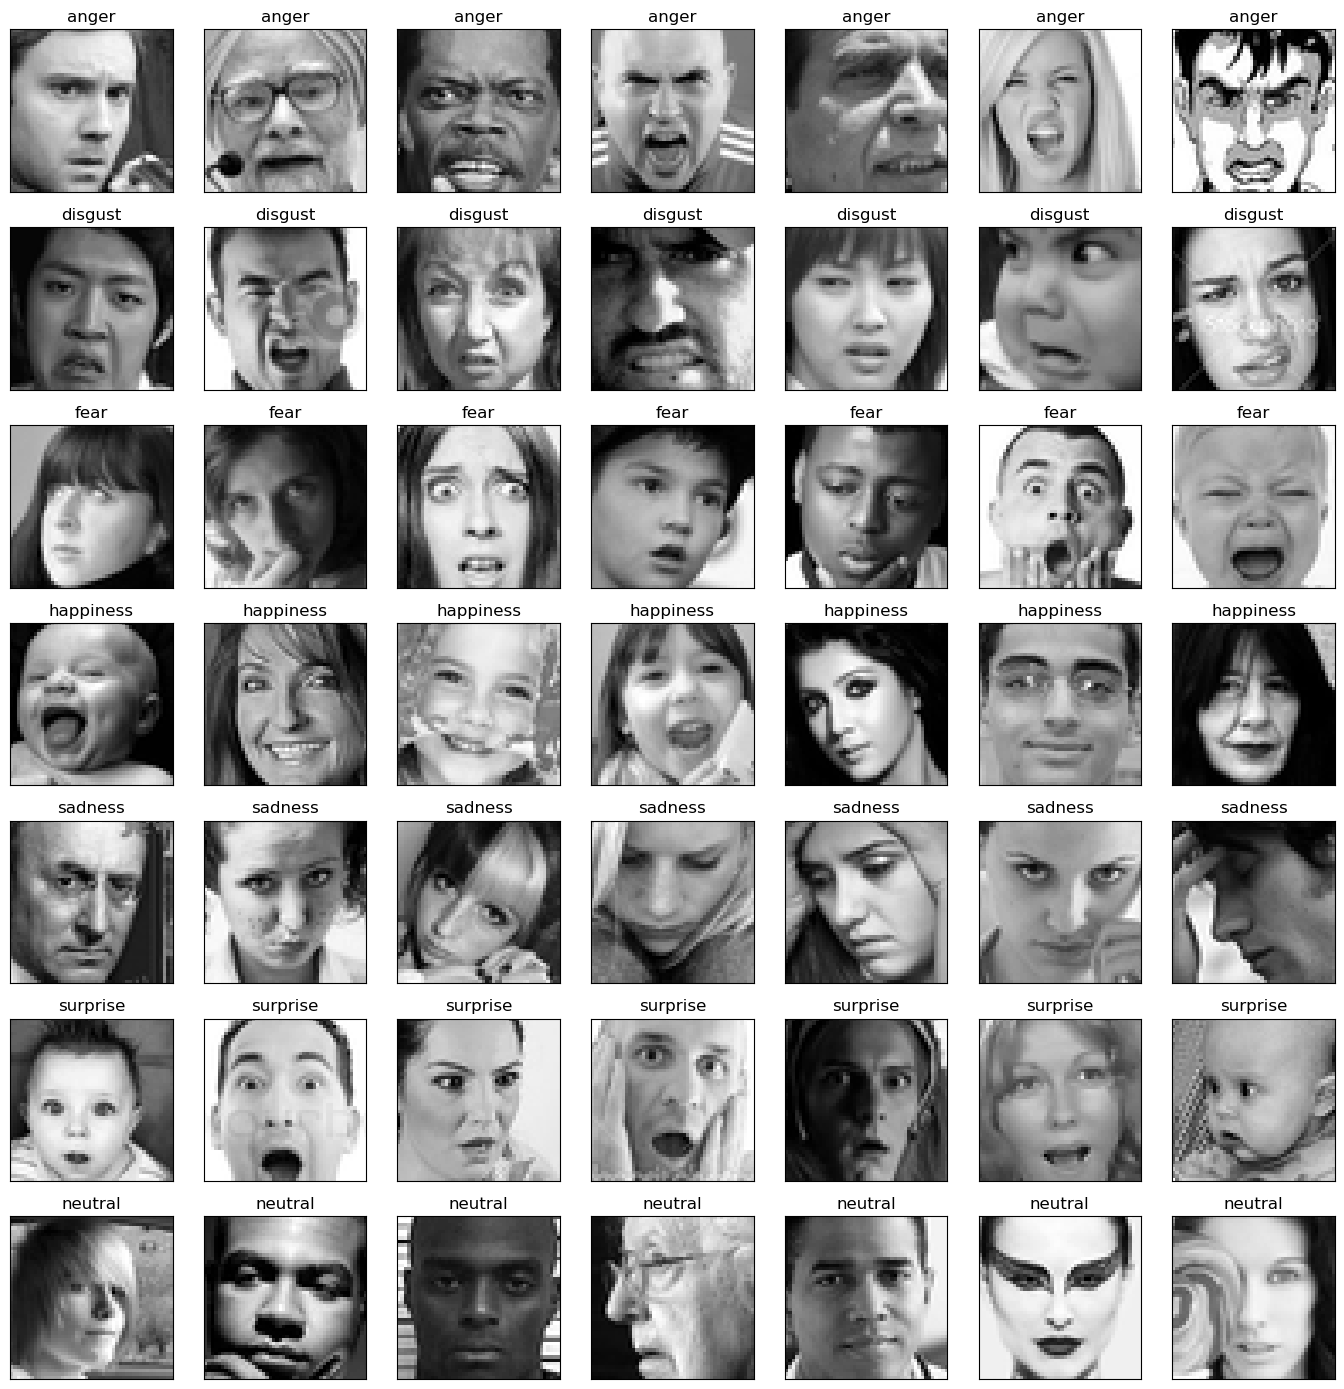

In [8]:
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap = 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()

### Now I will make the data compatible for neural networks.

In [9]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48).astype('float32'))
img_array = np.stack(img_array, axis = 0)

In [10]:
img_array.shape

(35887, 48, 48)

In [11]:
img_features = []

for i in range(len(img_array)):
    temp = cv2.cvtColor(img_array[i], cv2.COLOR_GRAY2RGB)
    img_features.append(temp)

img_features = np.array(img_features)
print(img_features.shape)

(35887, 48, 48, 3)


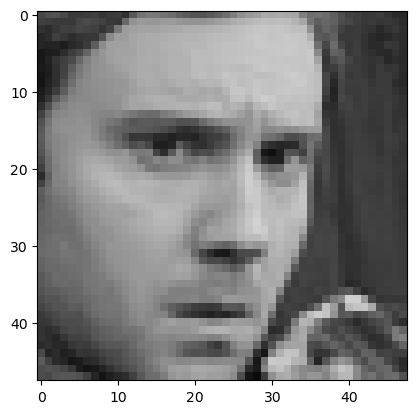

In [12]:
pyplot.imshow(img_features[0].astype(np.uint8));

In [13]:
le = LabelEncoder()

img_labels = le.fit_transform(df.emotion)
img_labels = np_utils.to_categorical(img_labels)
img_labels.shape

(35887, 7)

In [14]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


### Splitting the data into training and validation set.

In [15]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(img_features, 
                                                      img_labels, 
                                                      shuffle = True, 
                                                      stratify = img_labels, 
                                                      test_size = 0.1, 
                                                      random_state = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, 
                                                      y_train_valid, 
                                                      shuffle = True, 
                                                      stratify = y_train_valid, 
                                                      test_size = 0.11, 
                                                      random_state = 42)
X_train.shape, X_valid.shape,X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((28745, 48, 48, 3),
 (3553, 48, 48, 3),
 (3589, 48, 48, 3),
 (28745, 7),
 (3553, 7),
 (3589, 7))

In [16]:
# X_train,X_valid, y_train, y_valid = train_test_split(img_features, 
#                                                       img_labels, 
#                                                       shuffle = True, 
#                                                       stratify = img_labels, 
#                                                       test_size = 0.1, 
#                                                       random_state = 42)


In [17]:
# del df
# del img_features
# del img_labels

In [18]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

### Normalizing results, as neural networks are very sensitive to unnormalized data.

In [19]:
X_train = X_train / 255.
X_valid = X_valid / 255.

This code makes all layers of a VGG19 model non-trainable. This allows the model to be applied to a new problem using only pre-learned features, rather than reflecting changes in the training data to the model, while preserving the pre-trained weights. This is a technique often used in transfer learning applications.

In particular, while developing a facial emotion recognition model using the VGG19 model, the pre-trained weights of the model are preserved, allowing it to be used in solving a new emotion recognition problem. In this way, it may be possible to obtain better results using less data.

In [20]:
# for layer in vgg.layers:
    # layer.trainable = False

### I used two callbacks one is `early stopping` for avoiding overfitting training data and other `ReduceLROnPlateau` for learning rate.


In [21]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', 
                               min_delta = 0.00005, 
                               patience = 11,
                               verbose = 1, 
                               restore_best_weights = True,)

lr_scheduler = ReduceLROnPlateau(monitor = 'val_accuracy', 
                                 factor = 0.5, 
                                 patience = 7,
                                 min_lr = 1e-7,
                                 verbose = 1,)

callbacks = [early_stopping,lr_scheduler,]

### As the data in hand is less as compared to the task so ImageDataGenerator is good to go.

In [22]:
train_datagen = ImageDataGenerator(rotation_range = 15,
                                   width_shift_range = 0.15,
                                   height_shift_range = 0.15,
                                   shear_range = 0.15,
                                   zoom_range = 0.15,
                                   horizontal_flip = True,)
train_datagen.fit(X_train)

In [23]:
vgg_0 = tf.keras.applications.VGG19(weights = 'imagenet',
                                  include_top = False,
                                  input_shape = (48, 48, 3))


80134624/80134624 [==============================] - 0s 0us/step


In [24]:
vgg_1 = tf.keras.applications.VGG19(weights = 'imagenet',
                                  include_top = False,
                                  input_shape = (48, 48, 3))


In [25]:
vgg_2 = tf.keras.applications.VGG19(weights = 'imagenet',
                                  include_top = False,
                                  input_shape = (48, 48, 3))

In [26]:
def build_model(bottom_model, classes):
    model = bottom_model.layers[-2].output
    model = GlobalAveragePooling2D()(model)
    model = Dense(classes, activation = 'softmax', name = 'out_layer')(model)
    
    return model

In [27]:

learning_rates = [0.0001, 0.0001, 0.0001]  # Example learning rates
head_0 = build_model(vgg_0, num_classes)
head_1 = build_model(vgg_1, num_classes)
head_2 = build_model(vgg_2, num_classes)

model_0 = Model(inputs=vgg_0.input, outputs=head_0)

optims = [optimizers.Adam(learning_rate=learning_rates[0], beta_1=0.9, beta_2=0.999)]

model_0.compile(
        loss='categorical_crossentropy',
        optimizer=optims[0],
        metrics=['accuracy']
    )

model_1 = Model(inputs=vgg_1.input, outputs=head_1)

optims = [optimizers.Adam(learning_rate=learning_rates[1], beta_1=0.9, beta_2=0.999)]

model_1.compile(
        loss='categorical_crossentropy',
        optimizer=optims[0],
        metrics=['accuracy']
    )

model_2 = Model(inputs=vgg_2.input, outputs=head_2)

optims = [optimizers.Adam(learning_rate=learning_rates[2], beta_1=0.9, beta_2=0.999)]

model_2.compile(
        loss='categorical_crossentropy',
        optimizer=optims[0],
        metrics=['accuracy']
    )
models = [model_0, model_1, model_2]
for model in models:
    print(id(model))

132890242688976
132890242732416
132890242732272


In [28]:
# batch size of 32 performs the best.
batch_size = [2,32, 2048]
epochs = 35


histories = []

for i, lr in enumerate(learning_rates):
    print("Currently at i", i)
    print(id(models[i]))

    history = models[i].fit(
        train_datagen.flow(X_train, y_train, batch_size=batch_size[i]),
        validation_data=(X_valid, y_valid),
        steps_per_epoch=len(X_train) / batch_size[i],
        epochs=epochs,
        callbacks=callbacks,
        use_multiprocessing=True
    )
    histories.append(history)

Currently at i 0
132890242688976
Epoch 1/35
14372/14372 [==============================] - 240s 16ms/step - loss: 1.8186 - accuracy: 0.2476 - val_loss: 1.8135 - val_accuracy: 0.2505 - lr: 1.0000e-04
Epoch 2/35
14372/14372 [==============================] - 226s 16ms/step - loss: 1.7950 - accuracy: 0.2580 - val_loss: 1.7736 - val_accuracy: 0.2665 - lr: 1.0000e-04
Epoch 3/35
14372/14372 [==============================] - 226s 16ms/step - loss: 1.6436 - accuracy: 0.3257 - val_loss: 1.5339 - val_accuracy: 0.3816 - lr: 1.0000e-04
Epoch 4/35
14372/14372 [==============================] - 226s 16ms/step - loss: 1.4607 - accuracy: 0.4278 - val_loss: 1.3570 - val_accuracy: 0.4664 - lr: 1.0000e-04
Epoch 5/35
14372/14372 [==============================] - 226s 16ms/step - loss: 1.3666 - accuracy: 0.4754 - val_loss: 1.2891 - val_accuracy: 0.5072 - lr: 1.0000e-04
Epoch 6/35
14372/14372 [==============================] - 227s 16ms/step - loss: 1.3053 - accuracy: 0.5027 - val_loss: 1.2506 - val_accur

In [29]:
# history = model.fit(train_datagen.flow(X_train, 
#                                        y_train, 
#                                        batch_size = batch_size),
#                                        validation_data = (X_valid, y_valid),
#                                        steps_per_epoch = len(X_train) / batch_size,
#                                        epochs = epochs,
#                                        callbacks = callbacks,
#                                        use_multiprocessing = True)

In [30]:
# model_yaml = model.to_json()
# with open("model.yaml", "w") as yaml_file:
#     yaml_file.write(model_yaml)
    
# model.save("model.h5")

In [31]:
# import seaborn as sns
# from matplotlib import pyplot

# sns.set()
# fig = pyplot.figure(figsize=(12, 8))

# for index, history in enumerate(histories):
#     ax = pyplot.subplot(2, 2, index+1)
#     sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
#     sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
#     pyplot.title('Accuracy')
#     pyplot.tight_layout()

# for index, history in enumerate(histories):
#     ax = pyplot.subplot(2, 2, index+3)
#     sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
#     sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
#     pyplot.title('Loss')
#     pyplot.tight_layout()

# pyplot.savefig('epoch_history_dcnn.png')
# pyplot.show()


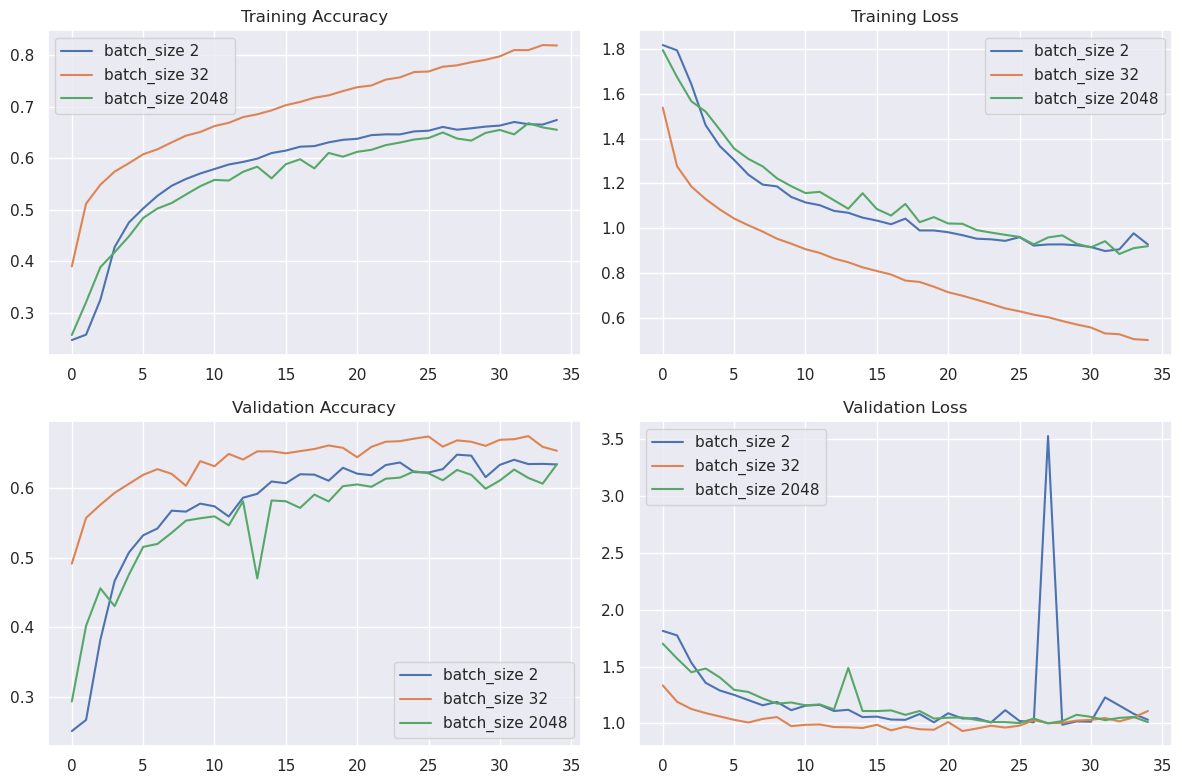

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, history in enumerate(histories):
    ax = axes[0, 0]
    sns.lineplot(x=history.epoch, y=history.history['accuracy'], label= "batch_size " + str(batch_size[i]), ax=ax)
    ax.set_title('Training Accuracy')

    ax = axes[0, 1]
    sns.lineplot(x=history.epoch, y=history.history['loss'], label="batch_size " + str(batch_size[i]), ax=ax)
    ax.set_title('Training Loss')

    ax = axes[1, 0]
    sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label="batch_size " + str(batch_size[i]), ax=ax)
    ax.set_title('Validation Accuracy')

    ax = axes[1, 1]
    sns.lineplot(x=history.epoch, y=history.history['val_loss'], label="batch_size " + str(batch_size[i]), ax=ax)
    ax.set_title('Validation Loss')

plt.tight_layout()
plt.savefig('epoch_history_dcnn.png')
plt.show()


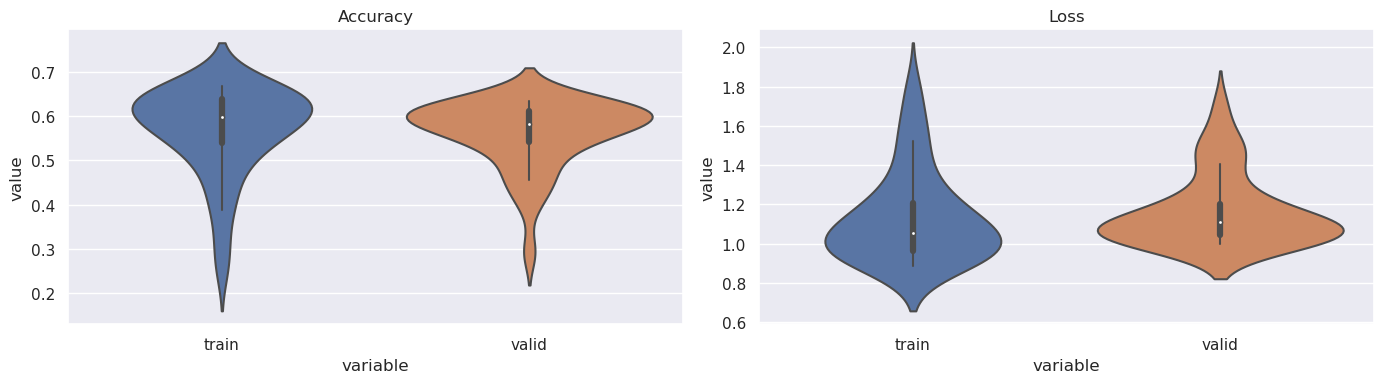

In [33]:
df_accu = pd.DataFrame({'train': history.history['accuracy'], 'valid': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train': history.history['loss'], 'valid': history.history['val_loss']})

fig = pyplot.figure(0, (14, 4))
ax = pyplot.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu), showfliers=False)
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss), showfliers=False)
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('performance_dist.png')
pyplot.show()

This is for testing data
113/113 [==============================] - 1s 10ms/step
total wrong validation predictions: 1826


              precision    recall  f1-score   support

           0       0.47      0.41      0.44       495
           1       0.22      0.42      0.29        55
           2       0.30      0.61      0.40       512
           3       0.83      0.66      0.74       899
           4       0.47      0.18      0.26       608
           5       0.49      0.78      0.60       400
           6       0.49      0.34      0.40       620

    accuracy                           0.49      3589
   macro avg       0.47      0.48      0.45      3589
weighted avg       0.54      0.49      0.49      3589



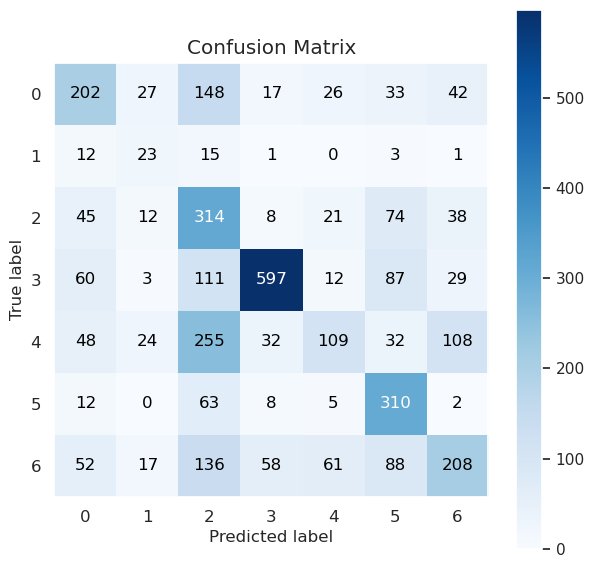

In [34]:
print("This is for testing data")
yhat_test = np.argmax(model.predict(X_test), axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_test, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_test)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_test))

this is for validationd data
112/112 [==============================] - 1s 8ms/step
total wrong validation predictions: 1300


              precision    recall  f1-score   support

           0       0.56      0.54      0.55       490
           1       0.40      0.46      0.43        54
           2       0.50      0.40      0.45       507
           3       0.87      0.84      0.86       890
           4       0.53      0.50      0.51       602
           5       0.70      0.74      0.72       396
           6       0.55      0.67      0.60       614

    accuracy                           0.63      3553
   macro avg       0.59      0.60      0.59      3553
weighted avg       0.63      0.63      0.63      3553



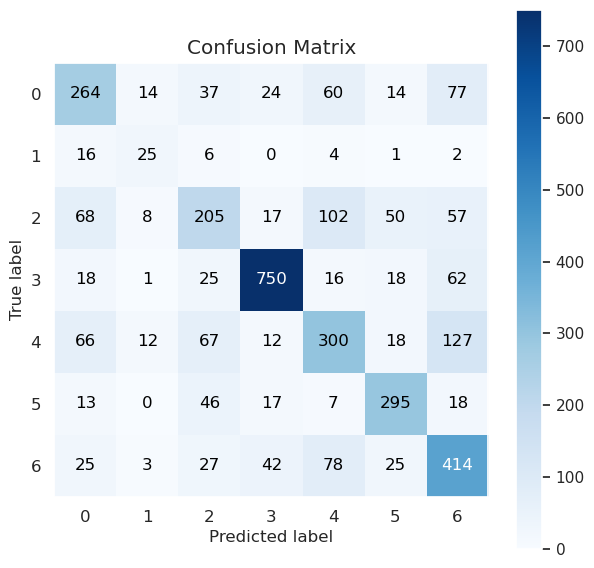

In [35]:
print("this is for validationd data")
yhat_valid = np.argmax(model.predict(X_valid), axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))

### The confusion matrix clearly shows that our model is doing good job on the class happy but it's performance is low on other two classes. One of the reason for this could be the fact that these two classes have less data. But when I looked at the images I found some images from these two classes are even hard for a human to tell whether the person is sad or neutral. Facial expression depends on individual as well. Some person's neutral face looks like sad.

In [36]:
mapper = {
    0: 'anger',
    1: 'disgust',
    2: 'fear',
    3: 'happiness',
    4: 'sadness',
    5: 'surprise',
    6: 'neutral'
}

1/1 [==============================] - 0s 19ms/step


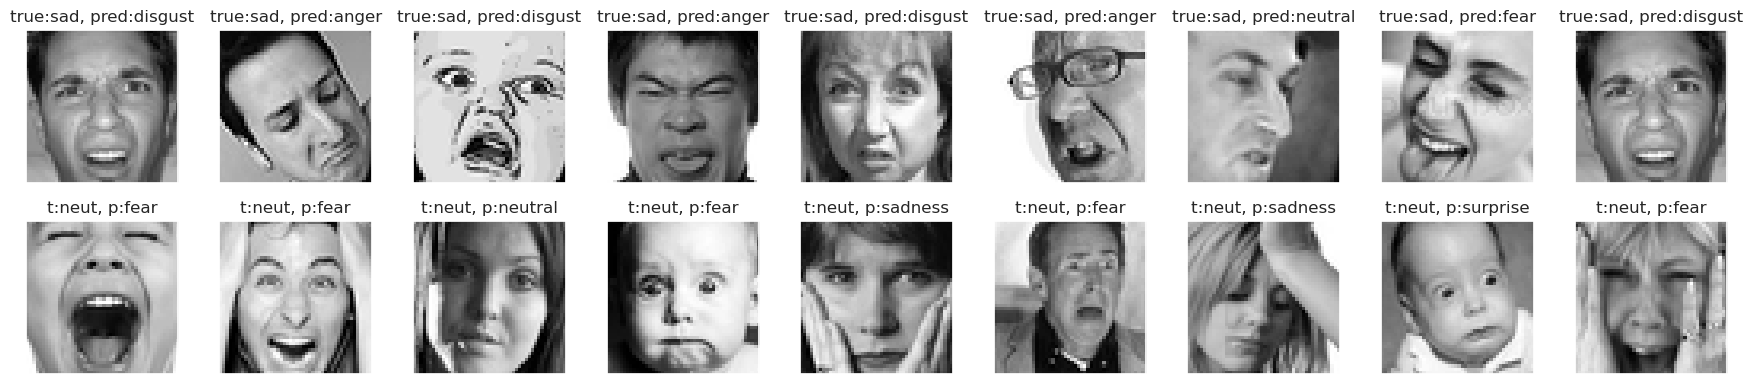

In [37]:
np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1]==1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2]==1)[0], size=9)

fig = pyplot.figure(1, (18, 4))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
        ax = pyplot.subplot(2, 9, i+1)
        sample_img = X_valid[sadidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_GRAY2RGB)

        ax.set_title(f"true:sad, pred:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,3))[0])]}")

        ax = pyplot.subplot(2, 9, i+10)
        sample_img = X_valid[neuidx,:,:,0]
        ax.imshow(sample_img, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        sample_img = cv2.cvtColor(sample_img, cv2.COLOR_GRAY2RGB)
        
        ax.set_title(f"t:neut, p:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,3))[0])]}")

        pyplot.tight_layout()